>>>>>                                                       Project : Predicting The Sales Of Products Across Stores Of A Retail Chain.   

                                                                        IMPORTING THE BASIC LIBRARIES AND LOADING THE DATA.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'D:\TSC_iON\useful\train_data.csv')
week = pd.read_csv(r'D:\TSC_iON\useful\date_to_week_id_map.csv')
prices = pd.read_csv(r'D:\TSC_iON\useful\product_prices.csv')

In [3]:
data

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0
...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0


In [4]:
week

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49
...,...,...
816,2014-03-27,165
817,2014-03-28,165
818,2014-03-29,166
819,2014-03-30,166


In [5]:
prices

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94
...,...,...,...,...
58995,333,3021,162,2.08
58996,333,3021,163,2.08
58997,333,3021,164,2.08
58998,333,3021,165,2.08


                                                                FEATURE ENGINEERING.

In [6]:
df = pd.merge(left = prices, right = week, on = 'week_id', how = 'inner')
df

,outlet,product_identifier,week_id,sell_price,date
0,111,74,49,2.94,2012-01-01
1,111,74,49,2.94,2012-01-02
2,111,74,49,2.94,2012-01-03
3,111,74,49,2.94,2012-01-04
4,111,74,49,2.94,2012-01-05
...,...,...,...,...,...
410495,333,3008,166,1.98,2014-03-30
410496,333,3008,166,1.98,2014-03-31
410497,333,3021,166,2.08,2014-03-29
410498,333,3021,166,2.08,2014-03-30


In [7]:
data = pd.merge(left = data, right = df, on = ['date', 'product_identifier', 'outlet'])
data

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


                                                                                EXPLORATORY DATA ANALYSIS/ DATA UNDERSTANDING.

In [8]:
print('-> Data Informations:-')
data.info()
print()
print('-> Data(Observations, Features):-' , data.shape)
print()
print('-> Total Size of the Dataset is:-' , data.size)
print()
print('-> Stat Summary of Data:-' '\n', data.describe())

-> Data Informations:-
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   product_identifier     395000 non-null  int64  
 2   department_identifier  395000 non-null  int64  
 3   category_of_product    395000 non-null  object 
 4   outlet                 395000 non-null  int64  
 5   state                  395000 non-null  object 
 6   sales                  395000 non-null  int64  
 7   week_id                395000 non-null  int64  
 8   sell_price             395000 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB

-> Data(Observations, Features):- (395000, 9)

-> Total Size of the Dataset is:- 3555000

-> Stat Summary of Data:-
        product_identifier  department_identifier         outlet  \
count       395000.000000          3

In [9]:
data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [10]:
data.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


In [11]:
print('-> Number of Duplicates if any;''\n', data.duplicated().value_counts())
print()
print('-> Number of Unique Values of Data-Points;''\n',data.nunique())
print()
print('-> Number of Missing Values if any ;' '\n', data.isna().sum())
print()
print('-> Data Types;''\n', data.dtypes)

-> Number of Duplicates if any;
 False    395000
dtype: int64

-> Number of Unique Values of Data-Points;
 date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
week_id                  113
sell_price               107
dtype: int64

-> Number of Missing Values if any ;
 date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

-> Data Types;
 date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: obj

In [12]:
data.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price'],
      dtype='object')

In [13]:
data['date'] = data['date'].astype('datetime64[ns]')
data['product_identifier'] = data['product_identifier'].astype('category')
data['department_identifier'] = data['department_identifier'].astype('category')
data['category_of_product'] = data['category_of_product'].astype('category')
data['outlet'] = data['outlet'].astype('category')
data['state'] = data['state'].astype('category')
data['week_id'] = data['week_id'].astype('category')
print('-> After Changing the D-types;''\n', data.dtypes)

-> After Changing the D-types;
 date                     datetime64[ns]
product_identifier             category
department_identifier          category
category_of_product            category
outlet                         category
state                          category
sales                             int64
week_id                        category
sell_price                      float64
dtype: object


    Insight 1: "Sales which is an int64 dtype is a Discrete Variables containing feature" and "Sell_Price which is a float64 dtype is a Continuous Variables containing feature" whereas "Product Identifier, Department Identifier, Category of Product, Outlet, State, Week Id are Categorical Variables containing feature".

In [14]:
data

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


    --> UNIVARIATE ANALYSIS.

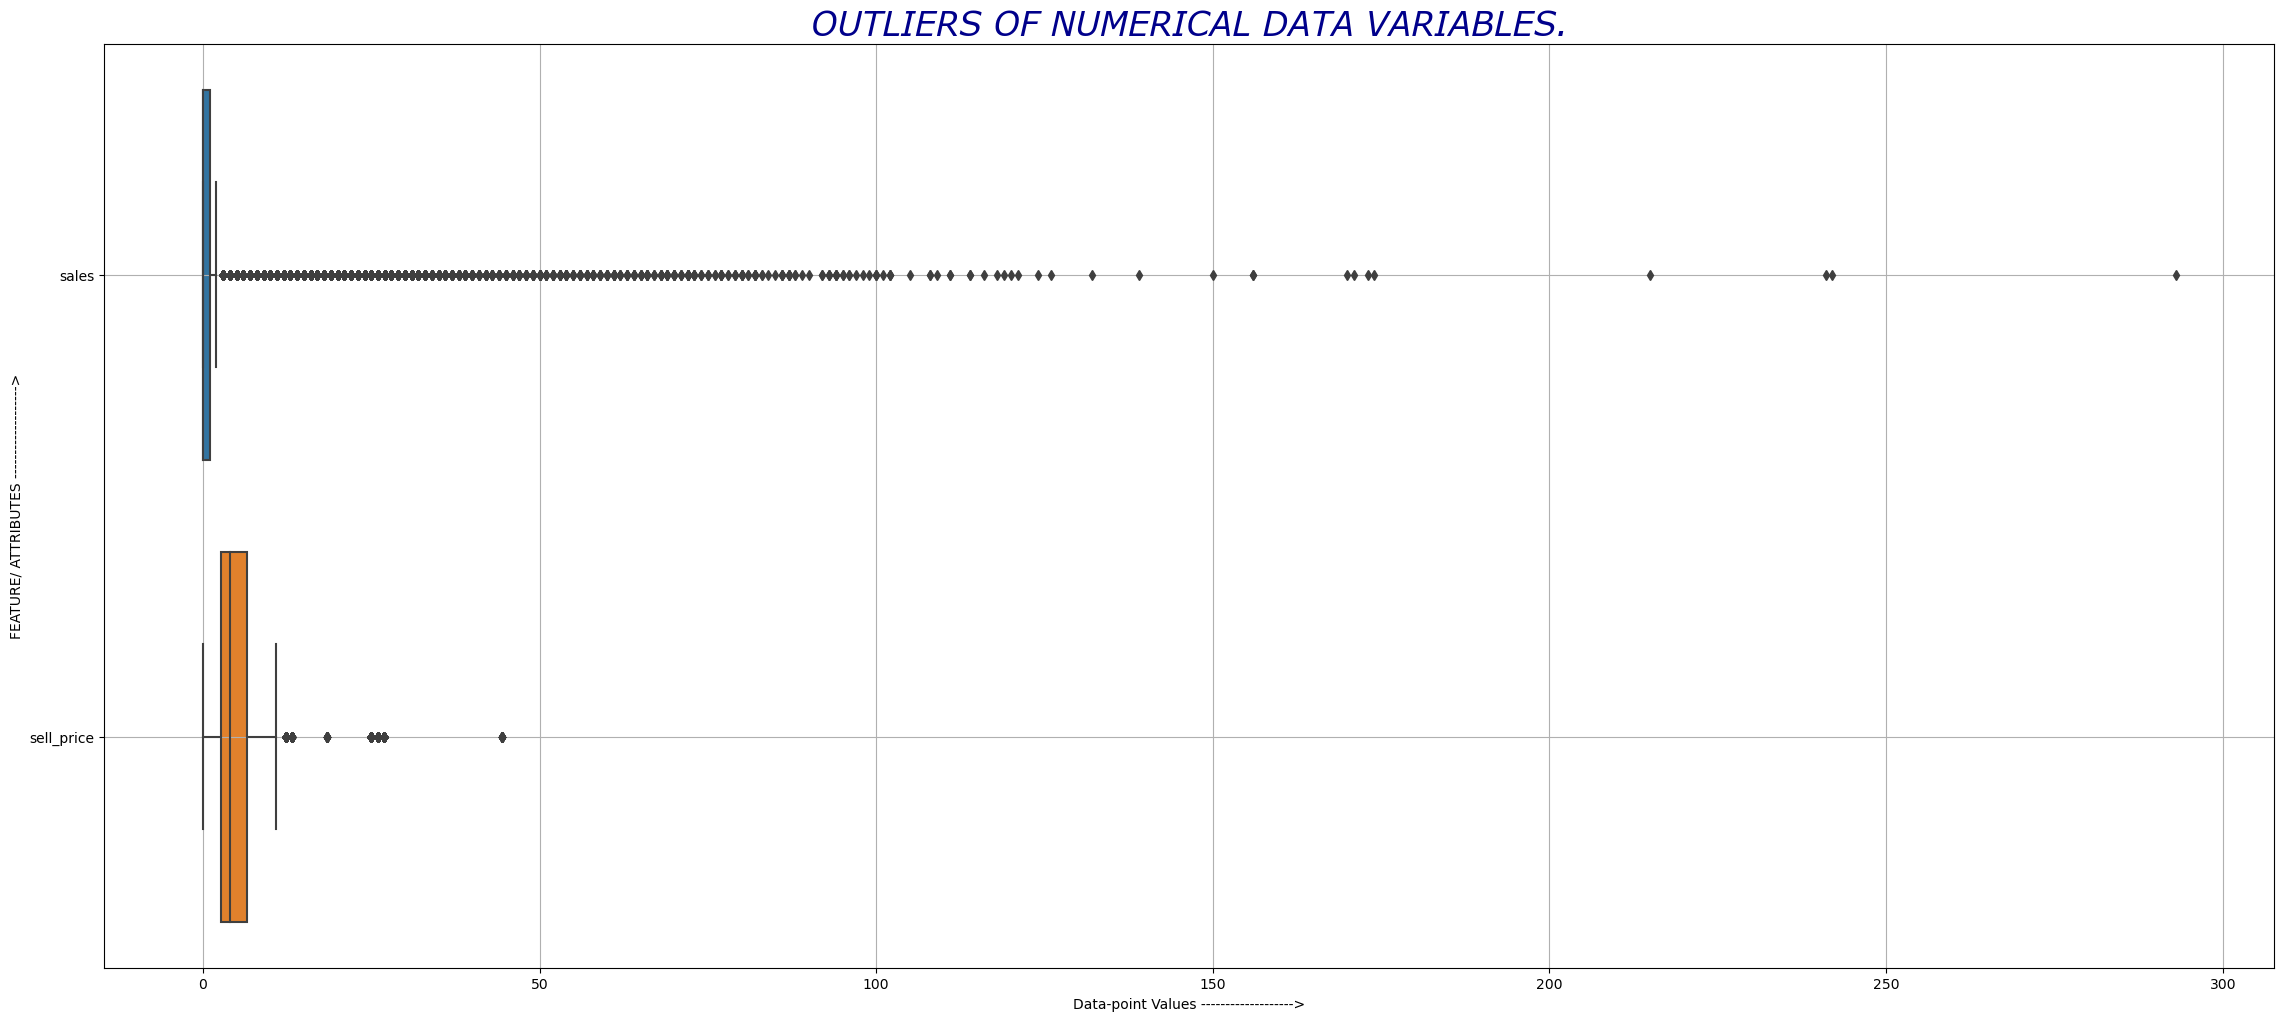

In [15]:
plt.figure(figsize=(28,12))
sns.boxplot(data = data, orient = 'h' )
plt.title('OUTLIERS OF NUMERICAL DATA VARIABLES.', fontdict = {'family': 'Verdana', 'color':  'darkblue', 'style':'italic', 'size':'24'})
plt.xlabel('Data-point Values ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.grid()

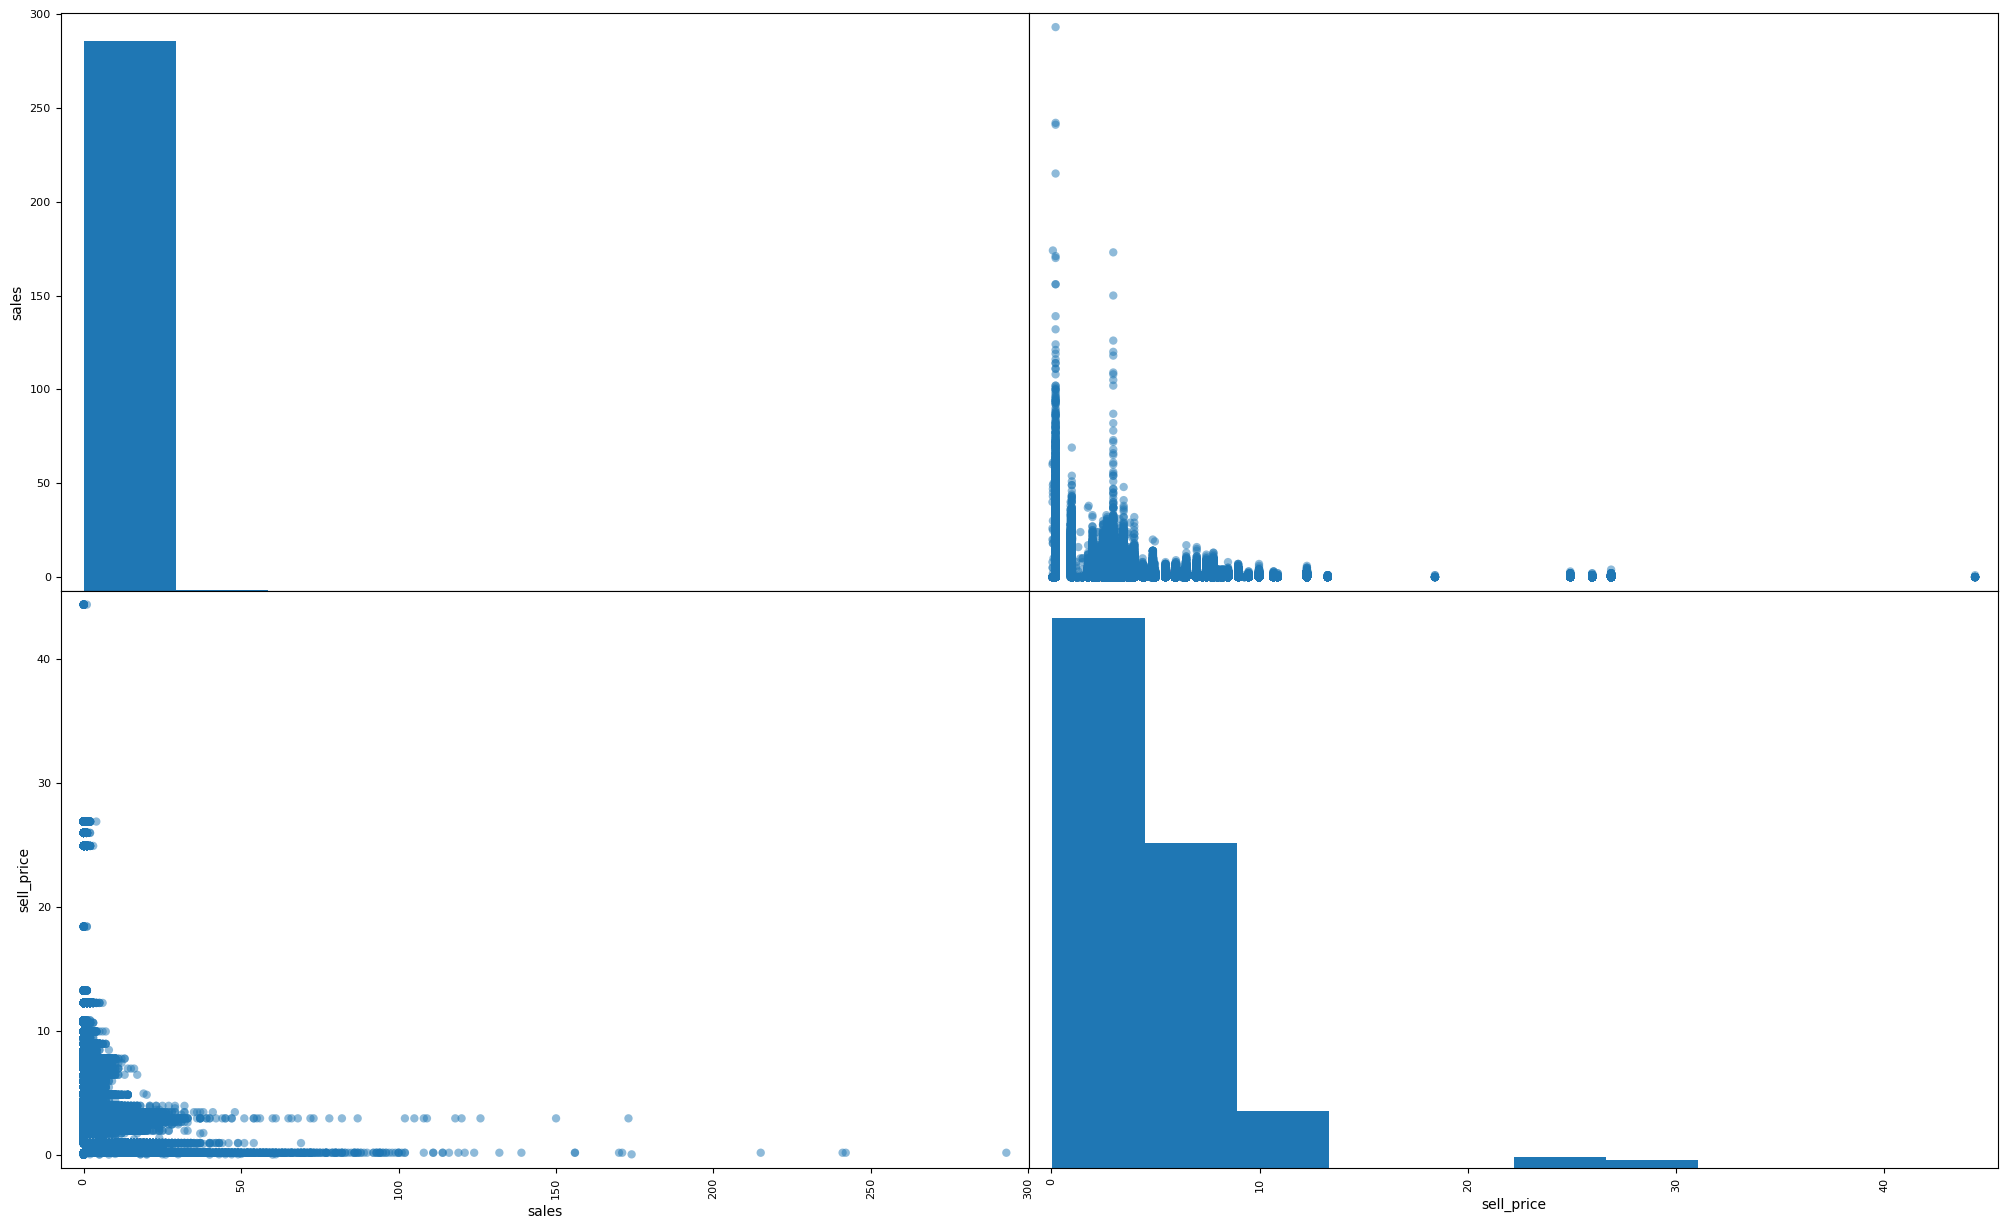

In [16]:
g = pd.plotting.scatter_matrix( figsize=(25,15), marker = 'o', frame = data, )
plt.show()

=> Separating the Data wrt States and saving dataframe with their respective names.

In [17]:
data.state.unique()

['Maharashtra', 'Telangana', 'Kerala']
Categories (3, object): ['Kerala', 'Maharashtra', 'Telangana']

In [18]:
Maharashtra = data[data['state'] == 'Maharashtra']
Telangana = data[data['state'] == 'Telangana']
Kerala = data[data['state'] == 'Kerala']

=> Separating the Data wrt Category of Products and saving dataframe with their respective names.

In [19]:
data.category_of_product.unique()

['others', 'fast_moving_consumer_goods', 'drinks_and_food']
Categories (3, object): ['drinks_and_food', 'fast_moving_consumer_goods', 'others']

In [20]:
drinks_and_food = data[data['category_of_product'] == 'drinks_and_food']
fast_moving_consumer_goods = data[data['category_of_product'] == 'fast_moving_consumer_goods']
others = data[data['category_of_product'] == 'others']

                                                                    FEATURE SELECTION FOR TIME SERIES ANALYSIS.

=> Droping the Features other than Date and No. of Sales of Category of Product from the orginal dataset and saving as other names hence not manupilating the already existing one.

In [21]:
daf = drinks_and_food.drop(columns = ['product_identifier', 'department_identifier', 'category_of_product', 'outlet', 'state', 'week_id', 'sell_price'], axis = 1).sort_values('date')
fmcg = fast_moving_consumer_goods.drop(columns = ['product_identifier', 'department_identifier', 'category_of_product', 'outlet', 'state', 'week_id', 'sell_price'], axis = 1).sort_values('date')
ot = others.drop(columns = ['product_identifier', 'department_identifier', 'category_of_product', 'outlet', 'state', 'week_id', 'sell_price'], axis = 1).sort_values('date')

In [22]:
daf = daf.groupby('date')['sales'].sum().reset_index()
fmcg = fmcg.groupby('date')['sales'].sum().reset_index()
ot = ot.groupby('date')['sales'].sum().reset_index()

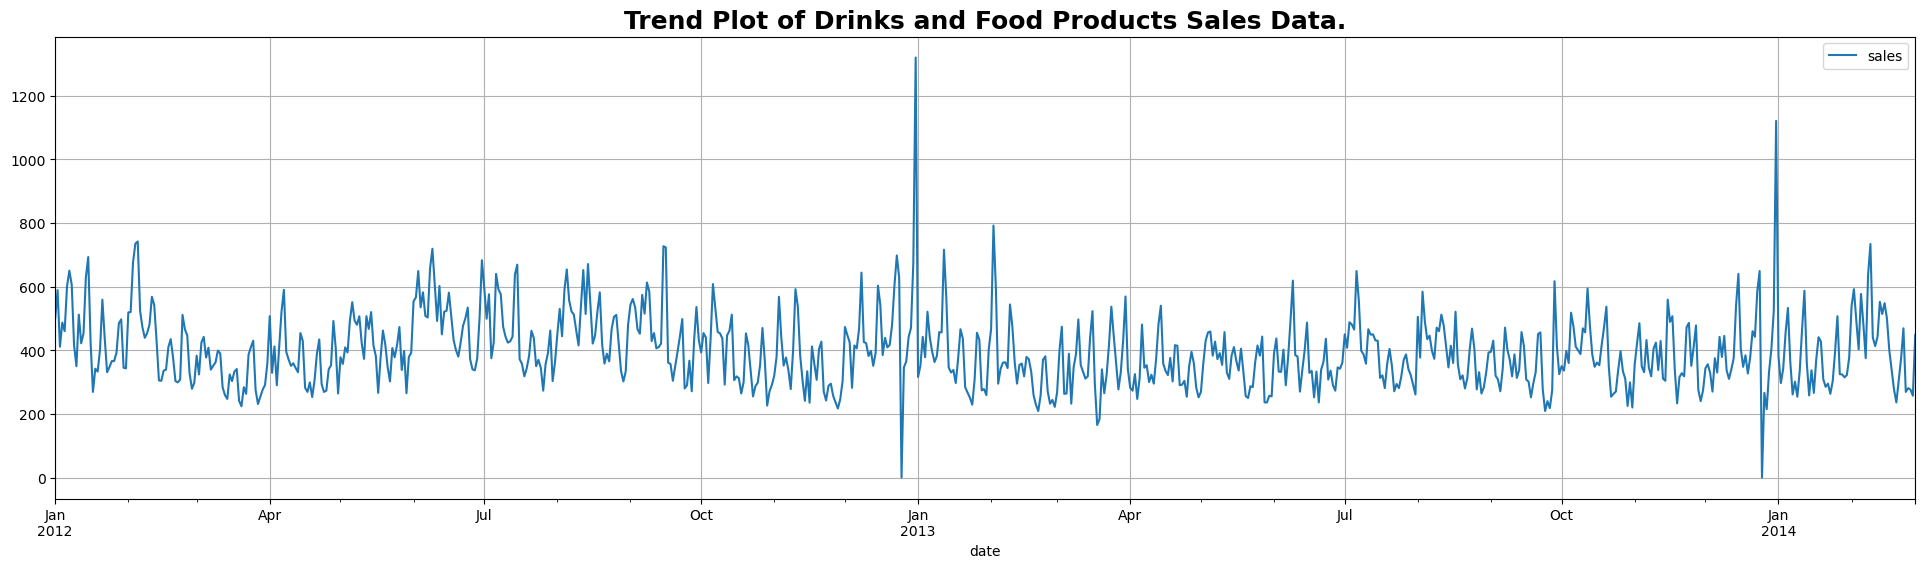

In [23]:
daf = daf.set_index('date')
daf.plot(figsize = (24, 6), grid = True)
plt.title('Trend Plot of Drinks and Food Products Sales Data.', fontsize = 18, fontweight = 'bold')
plt.show()

    Insight 2: "From the Trend Graph it's clear that there is an anomaly(sudden drop and sudden rise in the sales over that week.) in the Last weeks of december for both the years 2013 and 2014.

In [24]:
daf[daf.index == '2012-12-24']

,sales
date,
2012-12-24,628


In [25]:
daf[daf.index == '2012-12-25']

,sales
date,
2012-12-25,0


In [26]:
daf[daf.index == '2012-12-26']

,sales
date,
2012-12-26,346


    Insight 2(cont): Hence the observed anomaly (sudden drop in sum of sales) might be due to holiday on 25th December of the respective years in our data.

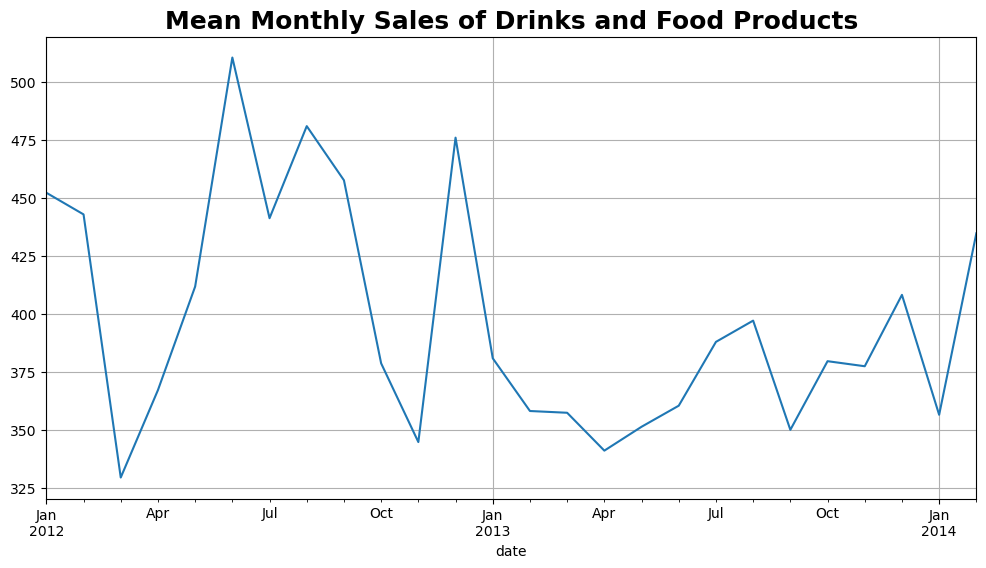

In [27]:
#taking monthly mean sales of category furniture
daf_res = daf['sales'].resample('MS').mean()

#observing mean monthly sales of furnitures
daf_res.plot(figsize = (12,6), grid = True)
plt.title('Mean Monthly Sales of Drinks and Food Products', fontsize = 18, fontweight = 'bold')
plt.show()

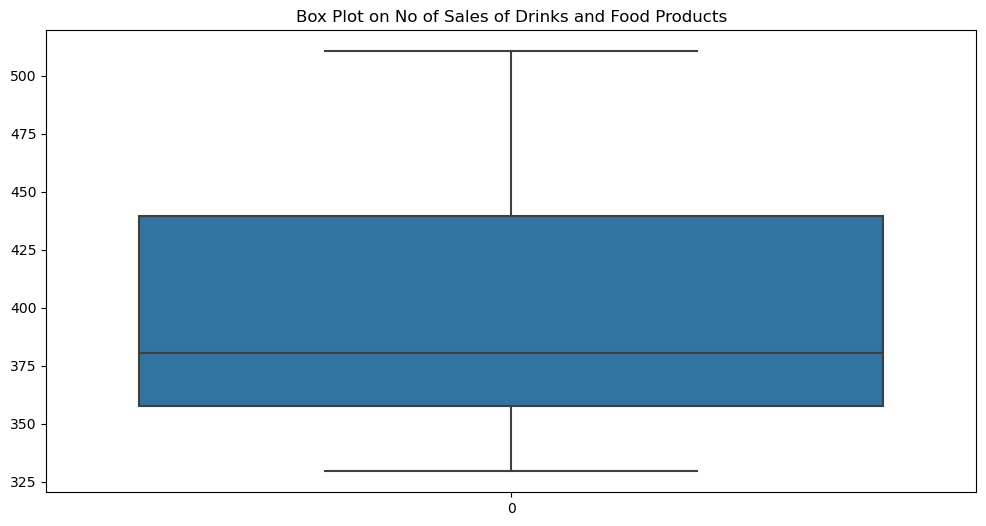

In [28]:
plt.figure(figsize = (12, 6))
sns.boxplot(daf_res).set_title('Box Plot on No of Sales of Drinks and Food Products')
plt.show()

In [29]:
daf_res.max()

510.5

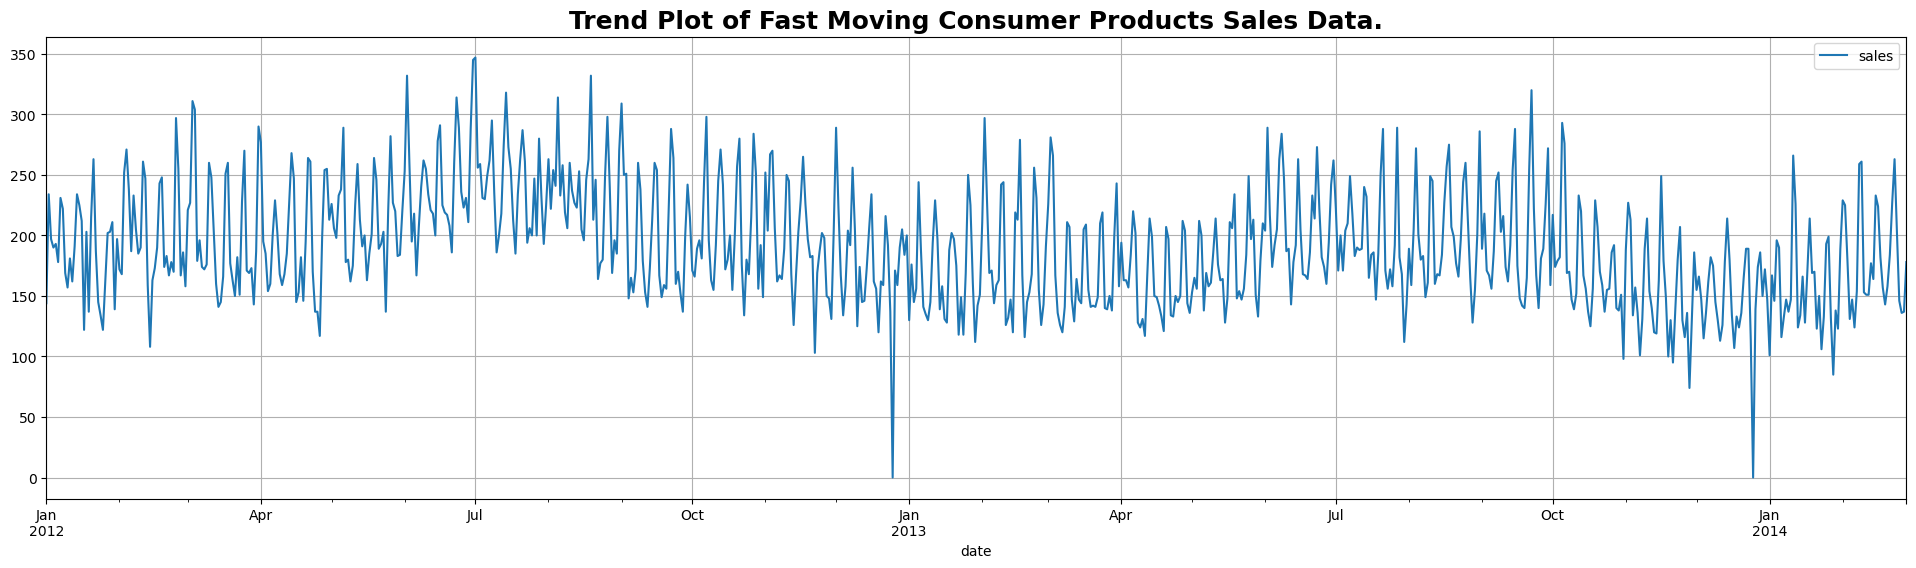

In [30]:
fmcg = fmcg.set_index('date')
fmcg.plot(figsize = (24, 6), grid = True)
plt.title('Trend Plot of Fast Moving Consumer Products Sales Data.', fontsize = 18, fontweight = 'bold')
plt.show()

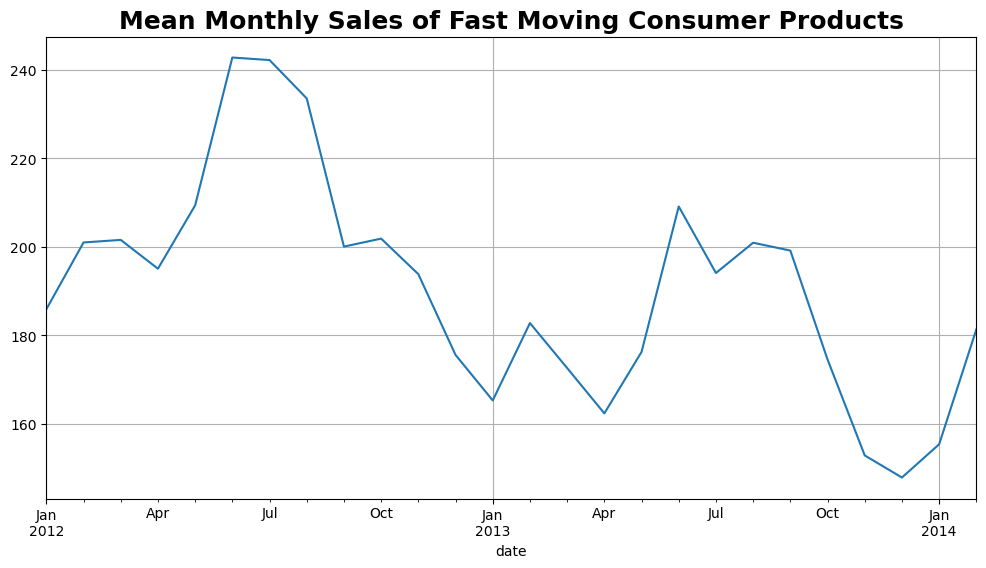

In [31]:
#Taking monthly mean sales of category fast moving consumers.
fmcg_res = fmcg['sales'].resample('MS').mean()

#Observing mean monthly sales of furnitures
fmcg_res.plot(figsize = (12,6), grid = True)
plt.title('Mean Monthly Sales of Fast Moving Consumer Products', fontsize = 18, fontweight = 'bold')
plt.show()

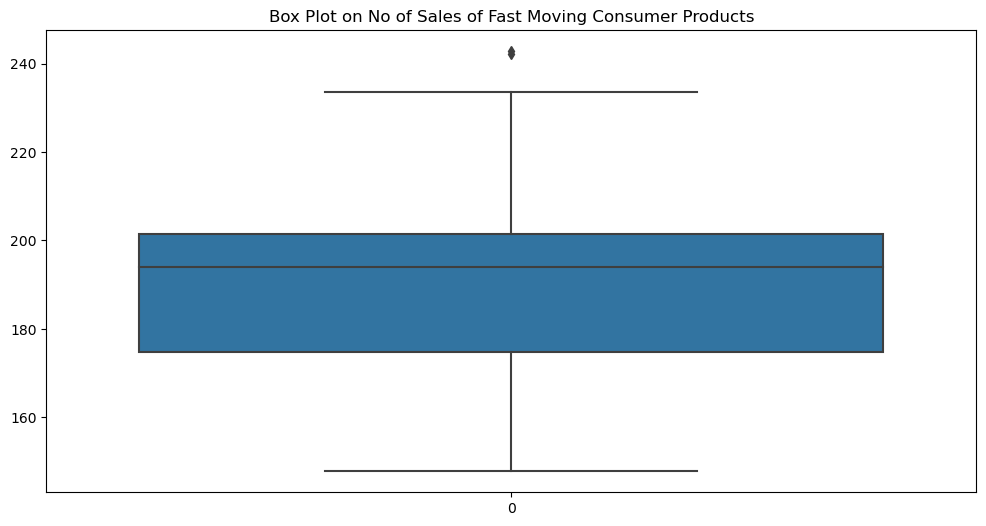

In [32]:
plt.figure(figsize = (12, 6))
sns.boxplot(fmcg_res).set_title('Box Plot on No of Sales of Fast Moving Consumer Products')
plt.show()

In [33]:
fmcg_res.max()

242.76666666666668

In [34]:
fmcg_res.min()

147.83870967741936

In [35]:
fmcg_res

date
2012-01-01    185.870968
2012-02-01    200.965517
2012-03-01    201.548387
2012-04-01    195.033333
2012-05-01    209.354839
2012-06-01    242.766667
2012-07-01    242.193548
2012-08-01    233.516129
2012-09-01    200.033333
2012-10-01    201.838710
2012-11-01    193.800000
2012-12-01    175.548387
2013-01-01    165.258065
2013-02-01    182.750000
2013-03-01    172.580645
2013-04-01    162.333333
2013-05-01    176.225806
2013-06-01    209.100000
2013-07-01    194.064516
2013-08-01    200.903226
2013-09-01    199.133333
2013-10-01    174.516129
2013-11-01    152.833333
2013-12-01    147.838710
2014-01-01    155.354839
2014-02-01    181.321429
Freq: MS, Name: sales, dtype: float64

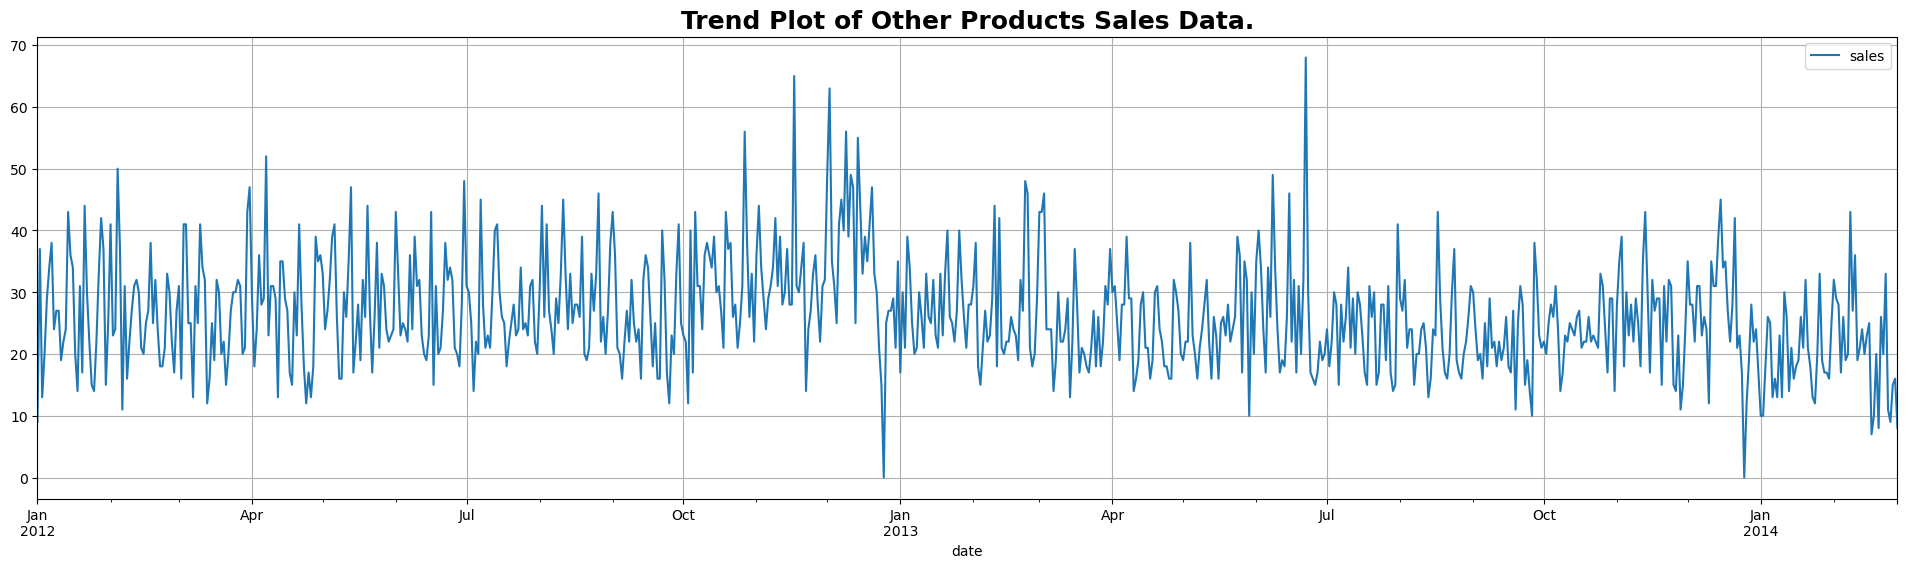

In [36]:
ot = ot.set_index('date')
ot.plot(figsize = (24, 6), grid = True)
plt.title('Trend Plot of Other Products Sales Data.', fontsize = 18, fontweight = 'bold')
plt.show()

In [37]:
ot[ot.index == '2013-06-23']

,sales
date,
2013-06-23,30


In [38]:
ot[ot.index == '2013-06-22']

,sales
date,
2013-06-22,68


In [39]:
ot[ot.index == '2013-06-21']

,sales
date,
2013-06-21,32


    Insight 5: "On 22 Dec 2013 there is a sudden peak in the sum of sales for the products in Other item Categories"

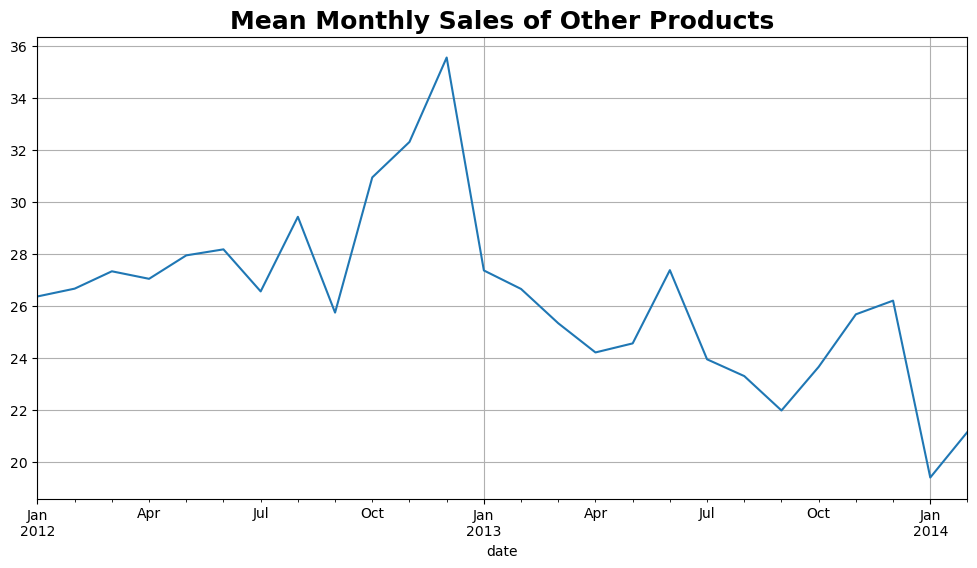

In [40]:
#Taking monthly mean sales of category fast moving consumers.
ot_res = ot['sales'].resample('MS').mean()

#Observing mean monthly sales of furnitures
ot_res.plot(figsize = (12,6), grid = True)
plt.title('Mean Monthly Sales of Other Products', fontsize = 18, fontweight = 'bold')
plt.show()

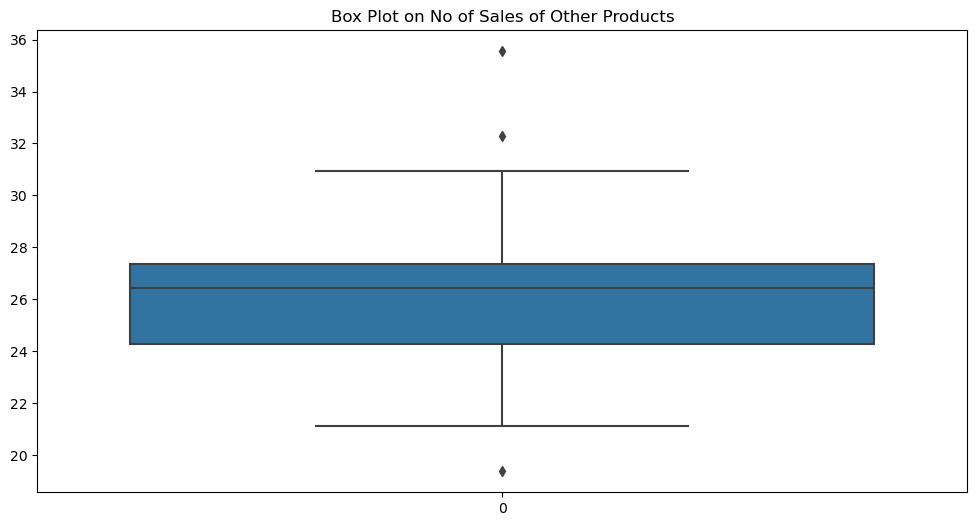

In [41]:
plt.figure(figsize = (12, 6))
sns.boxplot(ot_res).set_title('Box Plot on No of Sales of Other Products')
plt.show()

In [42]:
ot_res.max()

35.54838709677419

In [43]:
ot_res.min()

19.387096774193548

In [44]:
ot_res

date
2012-01-01    26.354839
2012-02-01    26.655172
2012-03-01    27.322581
2012-04-01    27.033333
2012-05-01    27.935484
2012-06-01    28.166667
2012-07-01    26.548387
2012-08-01    29.419355
2012-09-01    25.733333
2012-10-01    30.935484
2012-11-01    32.300000
2012-12-01    35.548387
2013-01-01    27.354839
2013-02-01    26.642857
2013-03-01    25.322581
2013-04-01    24.200000
2013-05-01    24.548387
2013-06-01    27.366667
2013-07-01    23.935484
2013-08-01    23.290323
2013-09-01    21.966667
2013-10-01    23.645161
2013-11-01    25.666667
2013-12-01    26.193548
2014-01-01    19.387097
2014-02-01    21.142857
Freq: MS, Name: sales, dtype: float64

Seasonal Decomposition Plot of each Category Variable's Mean Sales under the Feature 'Category-of-Product' using Moving Averages.

In [45]:
# Importing Libraries.

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

## * MONTHLY BASIS.

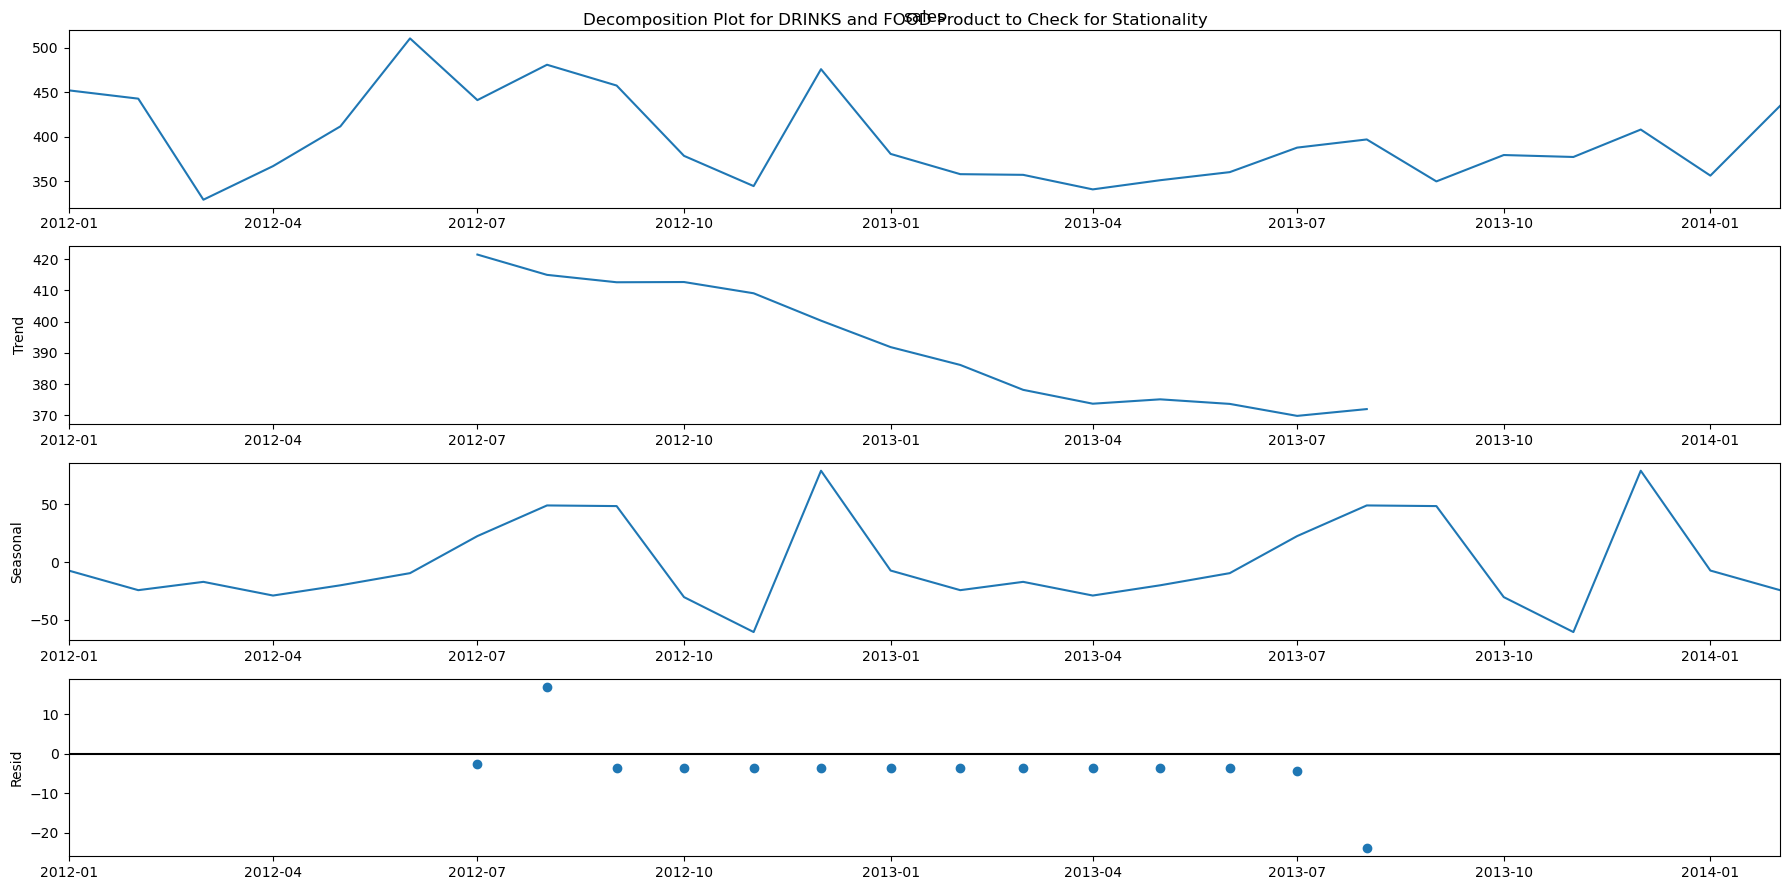

In [46]:
# DRINKS AND FOOD PRODUCT.

rcParams['figure.figsize'] = (18,9)
seasonal_decompose = sm.tsa.seasonal_decompose(daf_res, model = 'additive')
plot = seasonal_decompose.plot().suptitle('Decomposition Plot for DRINKS and FOOD Product to Check for Stationality')
plt.show()


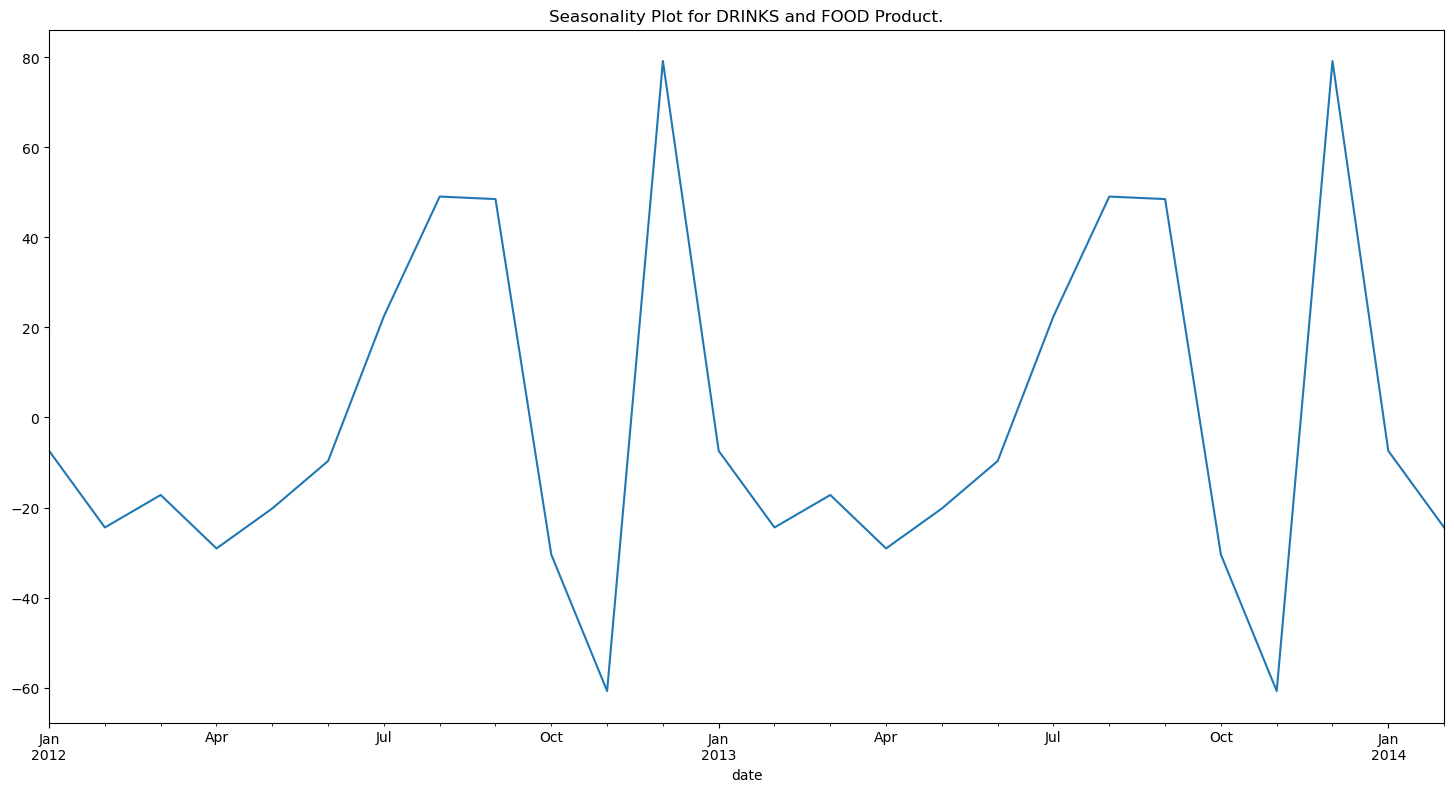

In [47]:
seasonality = seasonal_decompose.seasonal
plt.figure(figsize = (18,9))
plt.title('Seasonality Plot for DRINKS and FOOD Product.')
seasonality.plot()
plt.show()

* Sales:- "No of Mean Sales was seen the highest on June 2012 which is 510.5 and very less Mean Sales on the starting months of 2013 but it is gradually incresaing over the whole of Year 2013."
* Trend:- "Sales Trend is going downfall and at a faster pace during the year 2013".
* Seasonality:- "It is clear from the above plot that, Drinks and Food Products Sales is Seasonal over the period of 2012-2014".

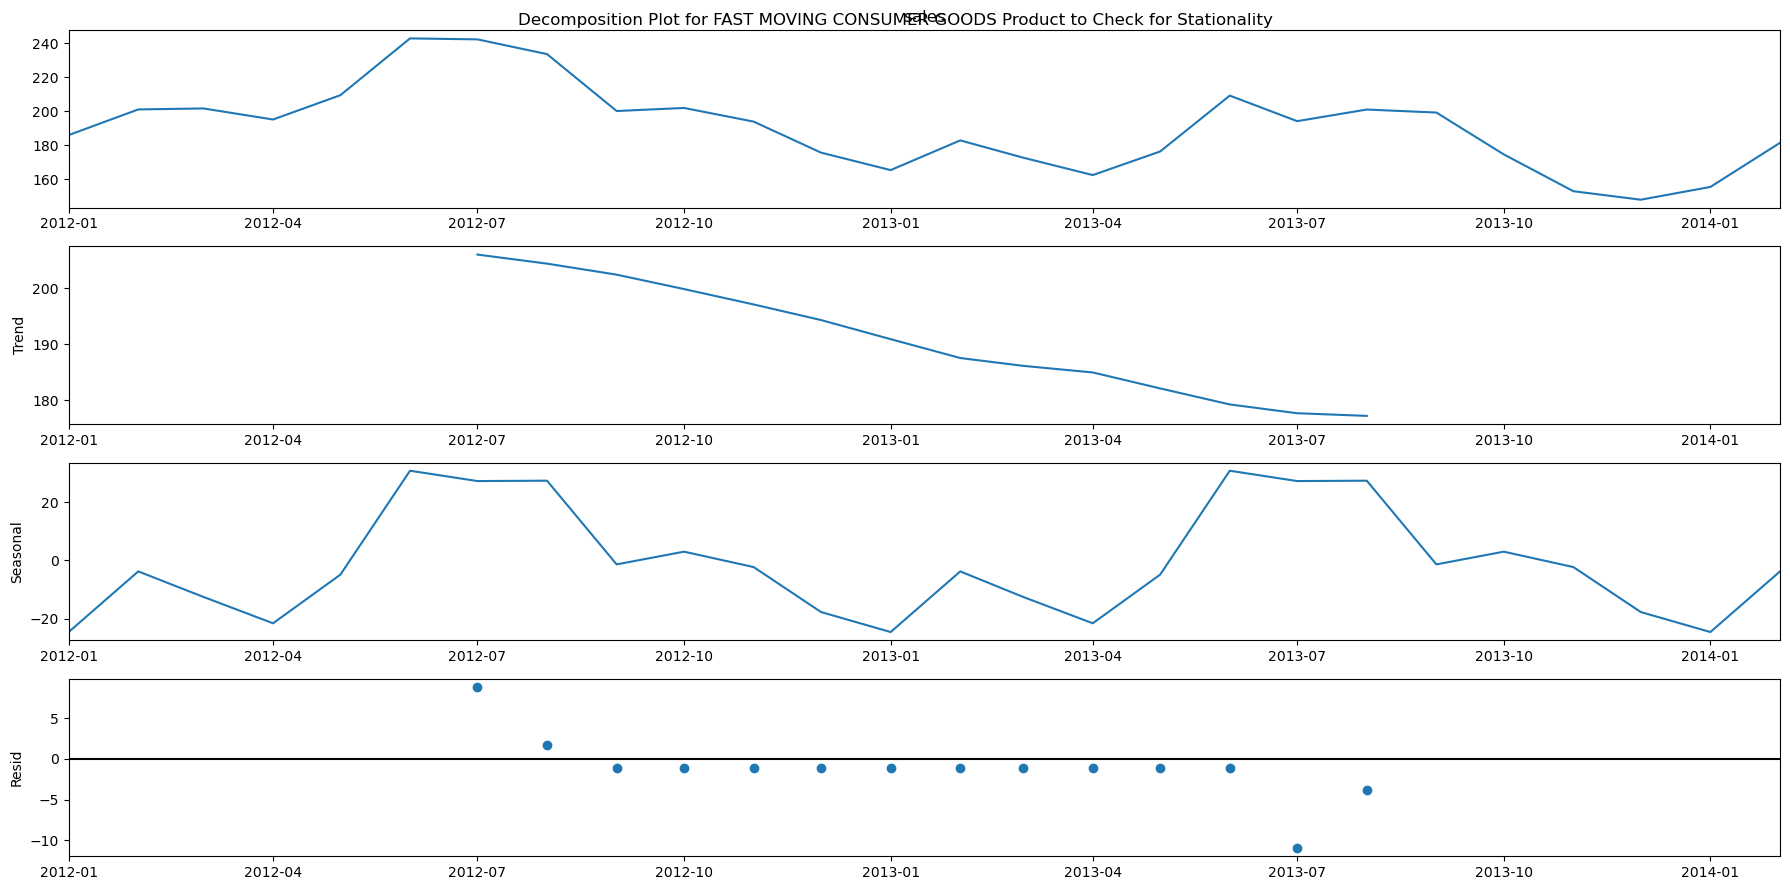

In [48]:
# FAST MOVING CONSUMER GOODS.

rcParams['figure.figsize'] = (18,9)
seasonal_decompose = sm.tsa.seasonal_decompose(fmcg_res, model = 'additive')
plot = seasonal_decompose.plot().suptitle('Decomposition Plot for FAST MOVING CONSUMER GOODS Product to Check for Stationality')
plt.show()

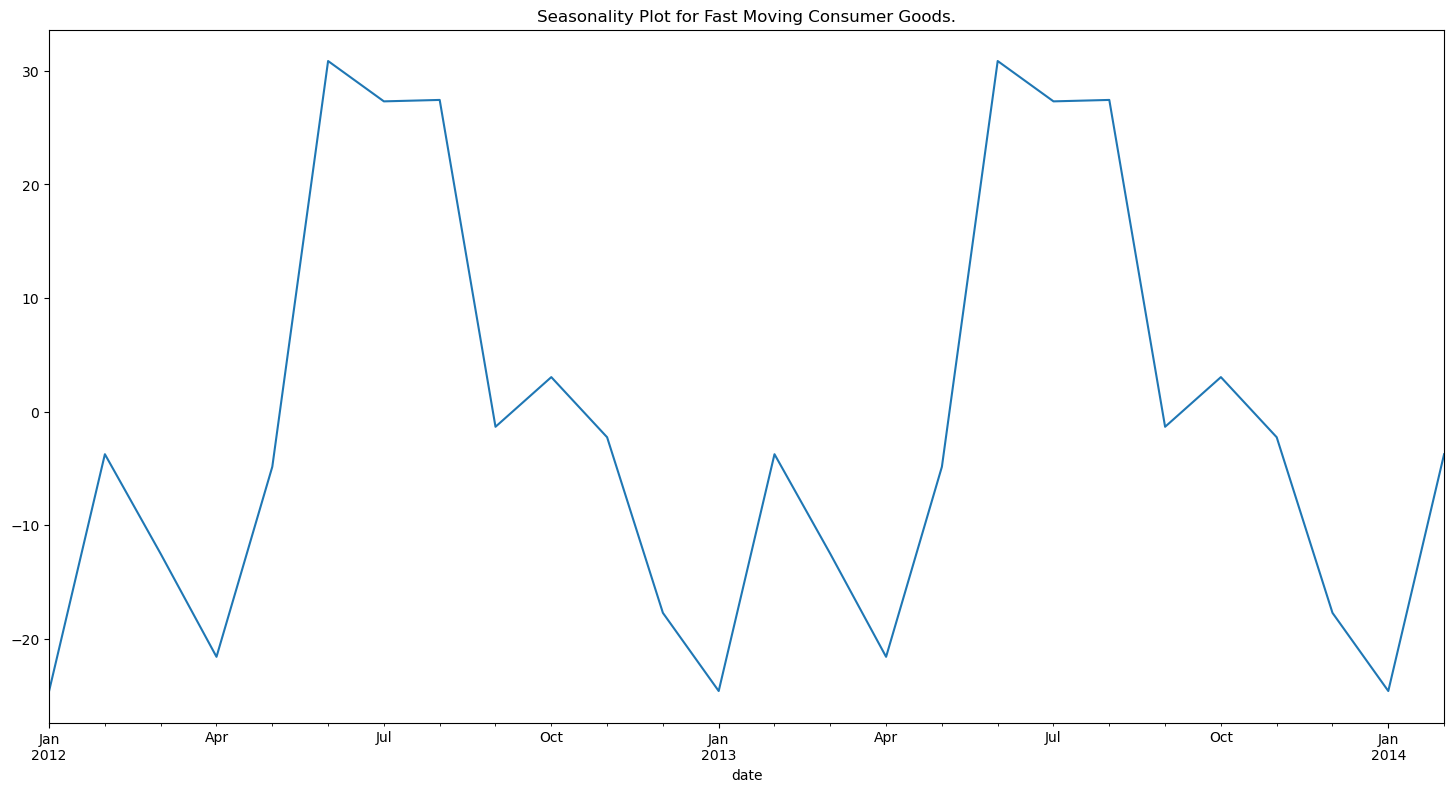

In [49]:
seasonality = seasonal_decompose.seasonal
plt.figure(figsize = (18,9))
plt.title('Seasonality Plot for Fast Moving Consumer Goods.')
seasonality.plot()
plt.show()

* Sales:- "No of Mean Sales was seen the highest on June-July 2012 which is 242.76 - 242.19 which is also that outlier seen on Box Plot and less Mean Sales on the month of December the next year 2013 for the total 2.2 Years data when comapred with 2012 pattern. But its decreasing and increasing over the entire year."
* Trend:- "Sales Trend is going downfall at a constant pace during the year 2012-2013".
* Seasonality:- "It is clear from the above plot that, Fast Movind Consumer Products Sales is Seasonal over the period of 2012-2014".

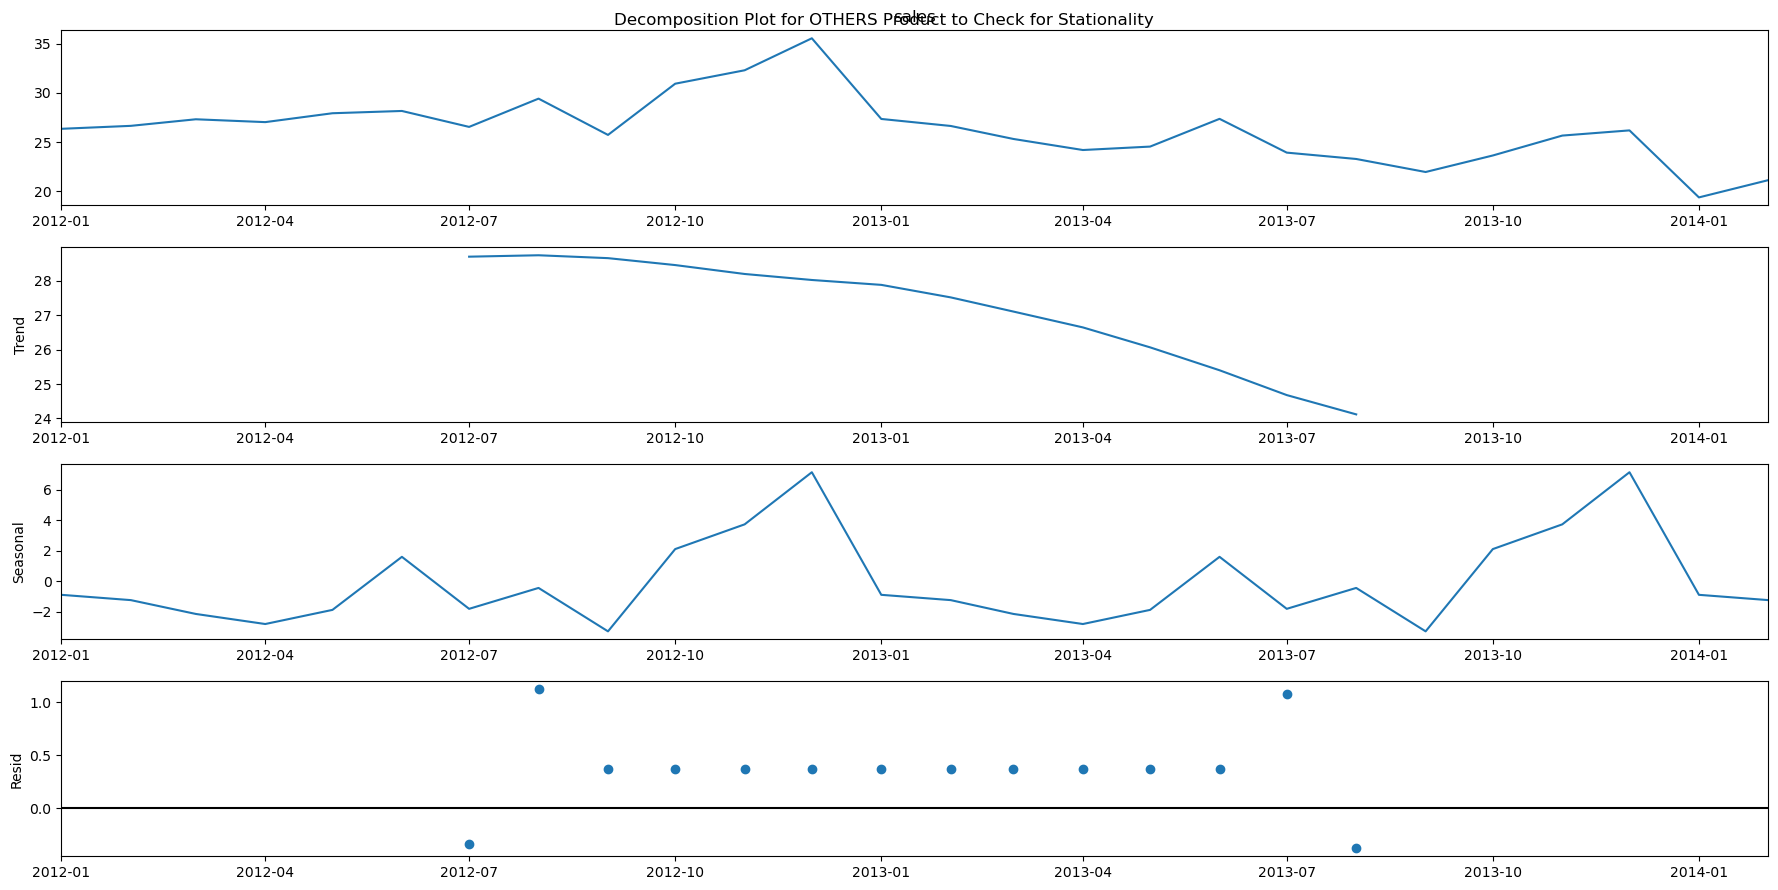

In [50]:
# OTHERS.

rcParams['figure.figsize'] = (18,9)
seasonal_decompose = sm.tsa.seasonal_decompose(ot_res, model = 'additive')
plot = seasonal_decompose.plot().suptitle('Decomposition Plot for OTHERS Product to Check for Stationality')
plt.show()

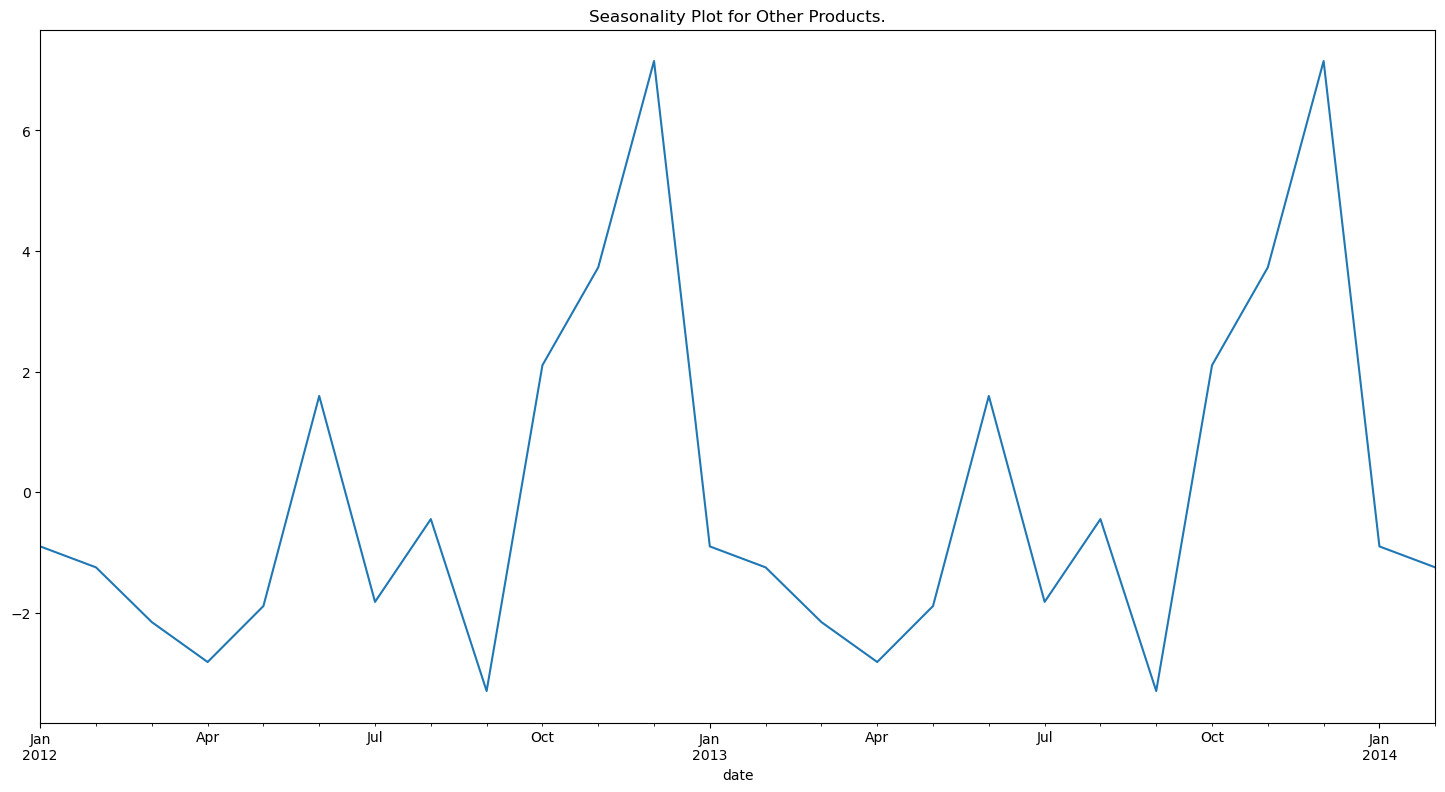

In [51]:
seasonality = seasonal_decompose.seasonal
plt.figure(figsize = (18,9))
plt.title('Seasonality Plot for Other Products.')
seasonality.plot()
plt.show()

* Sales:- "No of Mean Sales was seen the highest on December 2012 which is 35.54 and also is one of the positive outliers seen on Box Plot and less Mean Sales on the month of January the next-next year 2014 for the total 2.2 Years data."
* Trend:- "Sales Trend is going downfall at a noticable pace during the year 2012-2013".
* Seasonality:- "It is clear from the above plot that, Other Products Sales is Seasonal over the period of 2012-2014".
    

## * WEEKLY BASIS.

In [52]:
daf_W = daf['sales'].resample('W').mean()
daf_W

date
2012-01-01    501.000000
2012-01-08    543.428571
2012-01-15    496.285714
2012-01-22    395.285714
2012-01-29    397.857143
                 ...    
2014-02-02    399.285714
2014-02-09    528.857143
2014-02-16    487.142857
2014-02-23    342.714286
2014-03-02    306.200000
Freq: W-SUN, Name: sales, Length: 114, dtype: float64

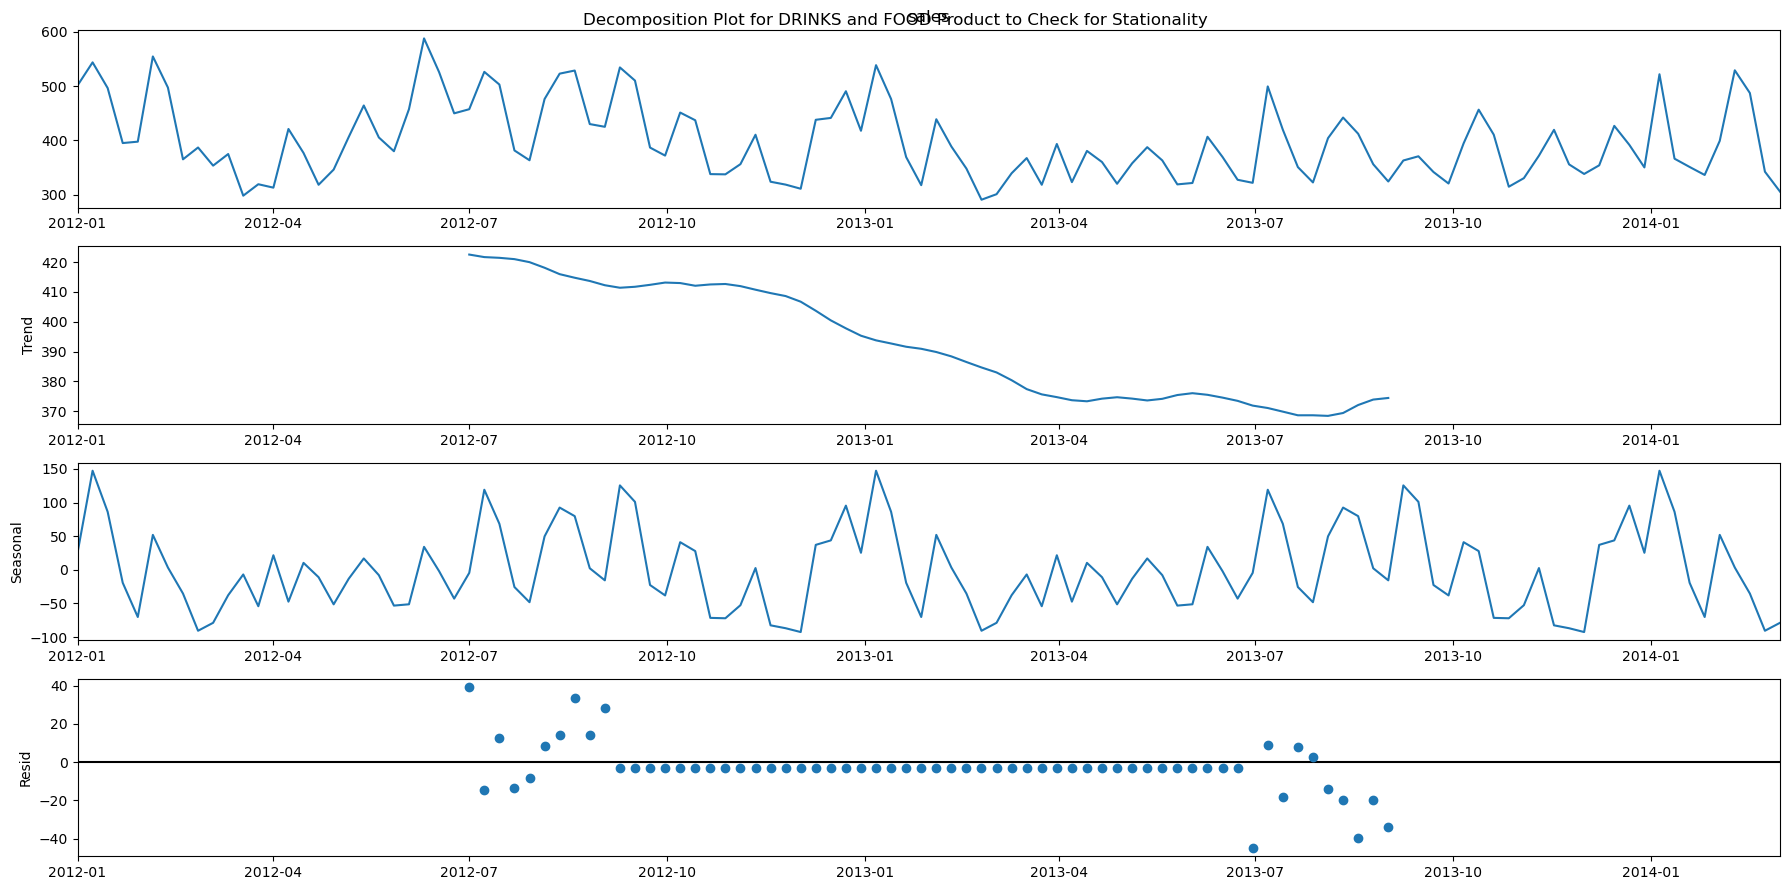

In [53]:
# DRINKS AND FOOD PRODUCT.

rcParams['figure.figsize'] = (18,9)
seasonal_decompose = sm.tsa.seasonal_decompose(daf_W, model = 'additive')
plot = seasonal_decompose.plot().suptitle('Decomposition Plot for DRINKS and FOOD Product to Check for Stationality')
plt.show()

In [54]:
fmcg_W = fmcg['sales'].resample('W').mean()
fmcg_W

date
2012-01-01    144.000000
2012-01-08    206.428571
2012-01-15    188.428571
2012-01-22    191.285714
2012-01-29    168.428571
                 ...    
2014-02-02    160.000000
2014-02-09    179.428571
2014-02-16    179.000000
2014-02-23    187.714286
2014-03-02    160.000000
Freq: W-SUN, Name: sales, Length: 114, dtype: float64

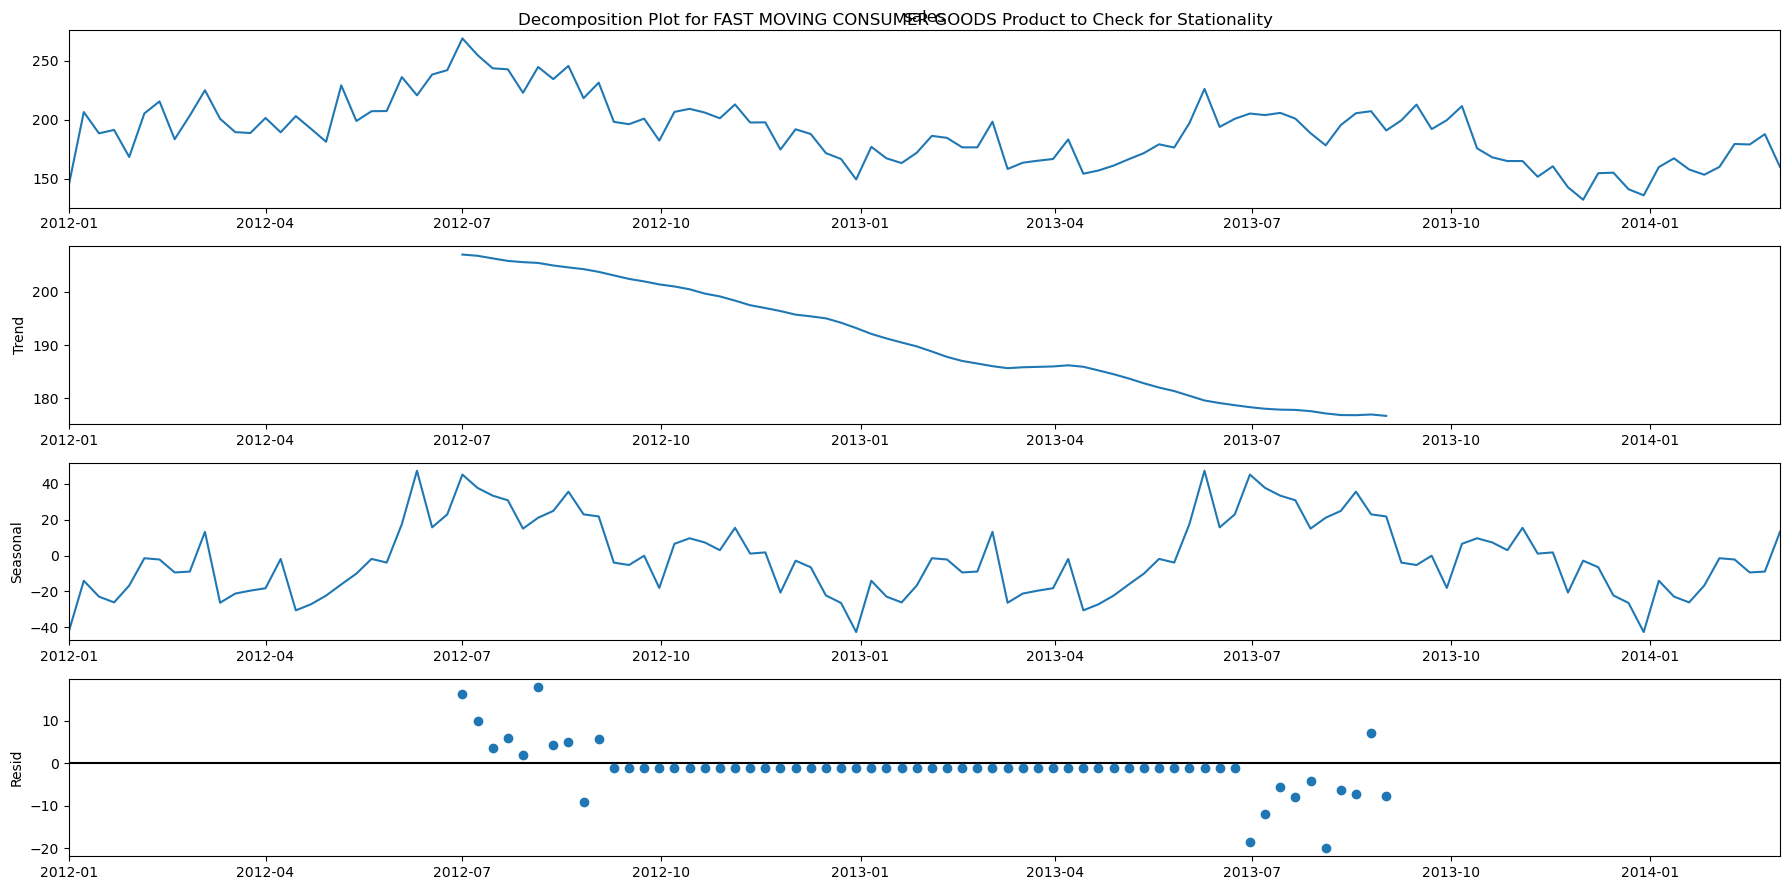

In [55]:
# FAST MOVING CONSUMER GOODS.

rcParams['figure.figsize'] = (18,9)
seasonal_decompose = sm.tsa.seasonal_decompose(fmcg_W, model = 'additive')
plot = seasonal_decompose.plot().suptitle('Decomposition Plot for FAST MOVING CONSUMER GOODS Product to Check for Stationality')
plt.show()

In [56]:
ot_W = ot['sales'].resample('W').mean()
ot_W

date
2012-01-01     9.000000
2012-01-08    27.857143
2012-01-15    28.285714
2012-01-22    27.142857
2012-01-29    26.428571
                ...    
2014-02-02    22.142857
2014-02-09    25.714286
2014-02-16    24.000000
2014-02-23    17.714286
2014-03-02    11.800000
Freq: W-SUN, Name: sales, Length: 114, dtype: float64

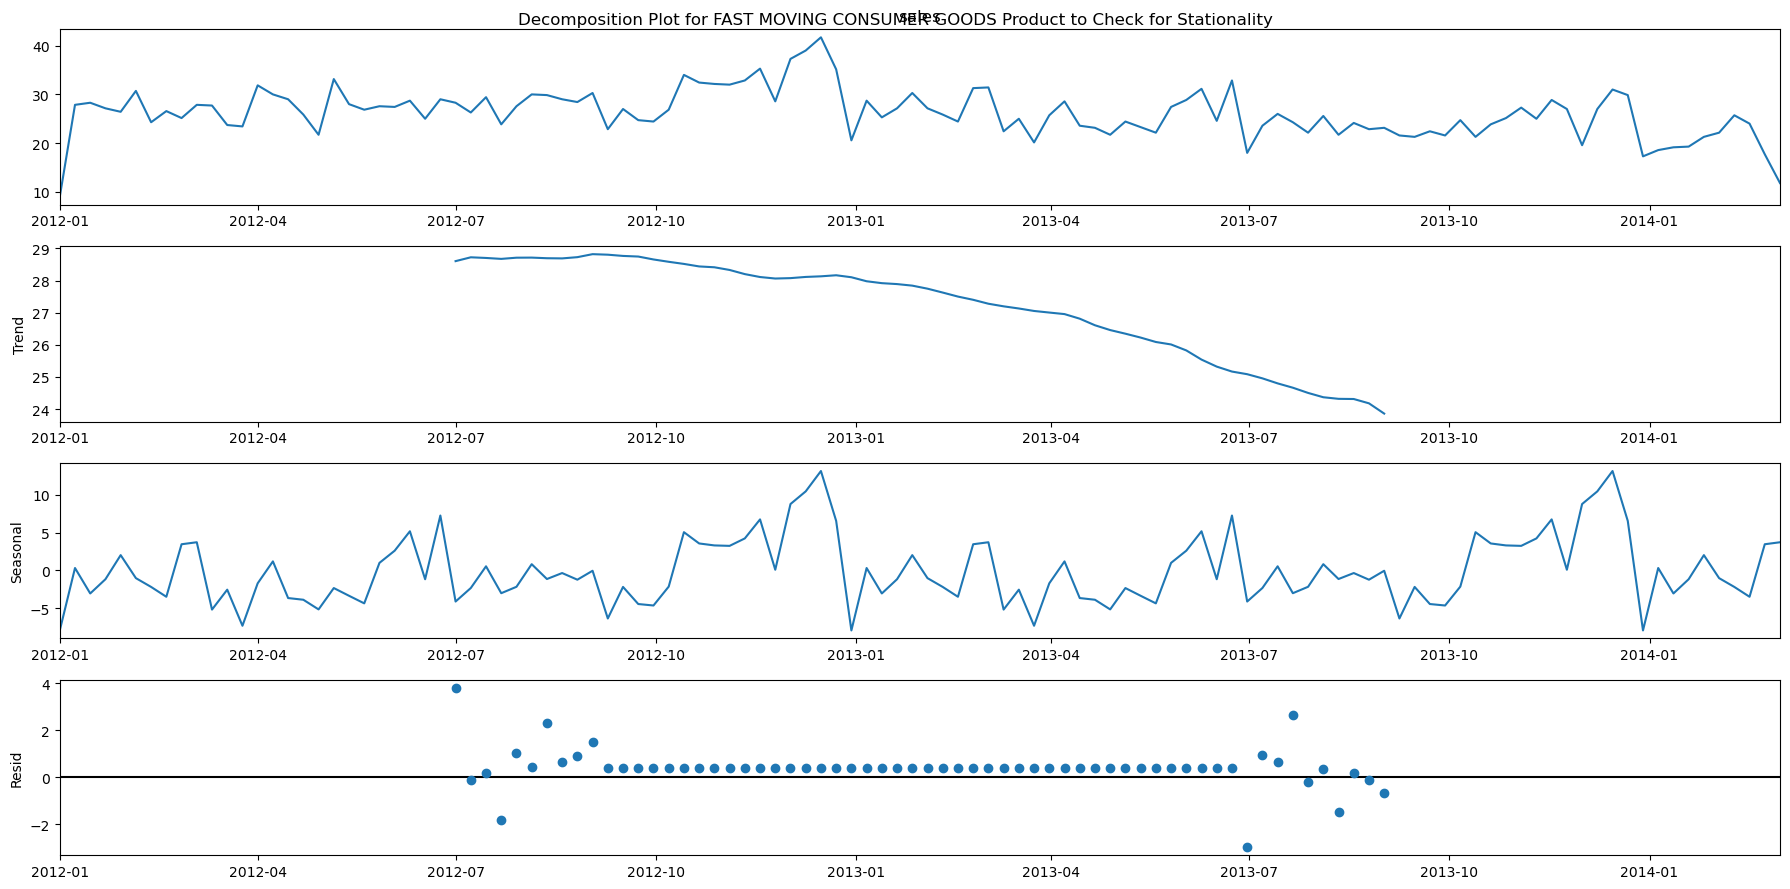

In [57]:
# OTHER.

rcParams['figure.figsize'] = (18,9)
seasonal_decompose = sm.tsa.seasonal_decompose(ot_W, model = 'additive')
plot = seasonal_decompose.plot().suptitle('Decomposition Plot for FAST MOVING CONSUMER GOODS Product to Check for Stationality')
plt.show()

TEST FOR STATIONARITY IN;

In [58]:
from statsmodels.tsa.stattools import adfuller

### Conditions/ Statements for Augmented Dicky-Fuller Test.
* Stationarity: stationarity implies the statistical properties of a time series do not change over time.
* A time series is said to be “stationary” if it has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time.

  H0 = Data is Non-Stationary.
 
  HA = Data is Stationary.

In [59]:
print('THE DRINKS AND FOOD PRODUCT SALES.')
print()
stat_test = adfuller(daf_W, autolag = 'AIC')
print('* ADF Test Statistics: ', stat_test[0])
print('* P-Value: ', stat_test[1])
print('* Number of Lags Used: ', stat_test[2])
print('* Number of Observations used for ADF Regression and Critical Values: ', stat_test[3])
print('* Critical Values: ')
for key, val in stat_test[4].items():
    print("\t",key, ": ", val)
print()
print('Inference on Stationarity:- ')
if stat_test[1]<= 0.05:
    print('Strong evidence against H0 condition. Data has No Unit Root and is Stationary.')
else:
    print('Weak evidence against H0 condition. Time series has a Unit Root and is Non-Stationary.')

THE DRINKS AND FOOD PRODUCT SALES.

* ADF Test Statistics:  -3.600104895149909
* P-Value:  0.005759022697757557
* Number of Lags Used:  5
* Number of Observations used for ADF Regression and Critical Values:  108
* Critical Values: 
	 1% :  -3.4924012594942333
	 5% :  -2.8886968193364835
	 10% :  -2.5812552709190673

Inference on Stationarity:- 
Strong evidence against H0 condition. Data has No Unit Root and is Stationary.


In [60]:
print('THE FAST MOVING CONSUMER GOODS.')
print()
stat_test_0 = adfuller(fmcg_W, autolag = 'AIC')
print('* ADF Test Statistics: ', stat_test_0[0])
print('* P-Value: ', stat_test_0[1])
print('* Number of Lags Used: ', stat_test_0[2])
print('* Number of Observations used for ADF Regression and Critical Values: ', stat_test_0[3])
print('* Critical Values: ')
for key, val in stat_test_0[4].items():
    print("\t",key, ": ", val)
print()
print('Inference on Stationarity:- ')
if stat_test_0[1]<= 0.05:
    print('Strong evidence against H0 condition. Data has No Unit Root and is Stationary.')
else:
    print('Weak evidence against H0 condition. Time series has a Unit Root and is Non-Stationary.')

THE FAST MOVING CONSUMER GOODS.

* ADF Test Statistics:  -2.2604383526895955
* P-Value:  0.1850448972661815
* Number of Lags Used:  1
* Number of Observations used for ADF Regression and Critical Values:  112
* Critical Values: 
	 1% :  -3.4901313156261384
	 5% :  -2.8877122815688776
	 10% :  -2.5807296460459184

Inference on Stationarity:- 
Weak evidence against H0 condition. Time series has a Unit Root and is Non-Stationary.


In [61]:
print('THE OTHER PRODUCT SALES.')
print()
stat_test_1 = adfuller(ot_W, autolag = 'AIC')
print('* ADF Test Statistics: ', stat_test_1[0])
print('* P-Value: ', stat_test_1[1])
print('* Number of Lags Used: ', stat_test_1[2])
print('* Number of Observations used for ADF Regression and Critical Values: ', stat_test_1[3])
print('* Critical Values: ')
for key, val in stat_test_1[4].items():
    print("\t",key, ": ", val)
print()
print('Inference on Stationarity:- ')
if stat_test_1[1]<= 0.05:
    print('Strong evidence against H0 condition. Data has No Unit Root and is Stationary.')
else:
    print('Weak evidence against H0 condition. Time series has a Unit Root and is Non-Stationary.')

THE OTHER PRODUCT SALES.

* ADF Test Statistics:  -1.9978655224712798
* P-Value:  0.2875097767240844
* Number of Lags Used:  4
* Number of Observations used for ADF Regression and Critical Values:  109
* Critical Values: 
	 1% :  -3.49181775886872
	 5% :  -2.8884437992971588
	 10% :  -2.5811201893779985

Inference on Stationarity:- 
Weak evidence against H0 condition. Time series has a Unit Root and is Non-Stationary.


    Insight 7: "So it is clear from the above augmented Dicky-Fuller Test, Only 'Drinks and Food' Data is Stationary whereas 'Fast Moving Consumer Good' and 'Other' Data are Non-stationary so if ARIMA Model is to be implemented for Forecasting then these fmcg_W and ot_W should be changed to stationary or else we can use SARIMAX instead of ARIMA with the non-stationary.

                                                            ************************************************

In [62]:
#fmcg_stat = fmcg_res.diff().dropna()
#ot_stat = ot_res.diff().dropna()

In [63]:
#print('RE-TESTING THE STATIONARITY FOR FAST MOVING CONSUMER GOOD PRODUCT SALES.')
#print()
#adfuller_test(fmcg_stat)

In [64]:
#print('RE-TESTING THE STATIONARITY FOR OTHER PRODUCT SALES.')
#print()
#adfuller_test(ot_stat)

In [65]:
#plt.figure(figsize = (12,6))
#fmcg_stat.plot(title = 'After changing trend of Fast Moving Consumer Goods Data to a Stationary Data.')
#plt.grid()

In [66]:
#plt.figure(figsize = (12,6))
#ot_stat.plot(title = 'After changing trend of Other Data to a Stationary Data.')
#plt.grid()

    Insight 8: 'So after using differencing diff() function the Non-stationary datas of Fast Moving Consumer Goods and Other Datas have become Stationary with the confirmation with the help of retesting again it with augmented dicky-fuller test.

                                                            ************************************************